# Polynomial Model


*Sushmitha Jayaramaiah*

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [113]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W = W - alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )

In [114]:
# Polynomial Model function - Convert X to a column matrix and multiplying it with weights.

def polynomial_model(X, W):
    X = X**range(W.shape[0])
    return X @ W

In [115]:
# Polynomial Gradient function

def polynomial_gradient(X, T, W): 
    Y = polynomial_model(X, W)
    result  = (X**range(W.shape[0])).T @ (-2 * ( T - Y))/ (X.shape[0])
    return result

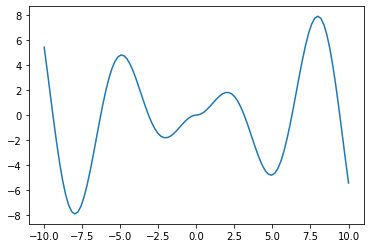

In [116]:
#Test Data

X = np.linspace(-10, 10, 100).reshape(-1, 1)
T = np.sin(X) * np.abs(X)
plt.plot(X, T);

In [117]:
#Calling the function on test data
n_powers = 5
W = np.zeros((n_powers, 1))# Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

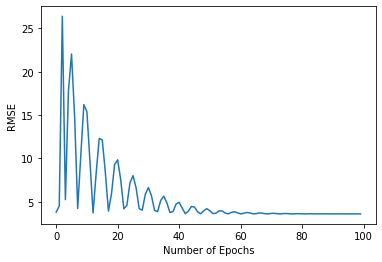

In [118]:
#Test Data
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

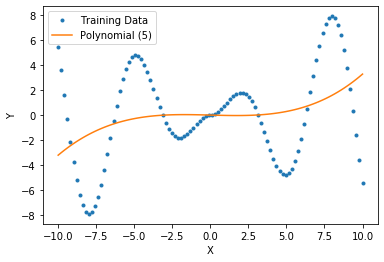

In [119]:
#Test Data
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Air Quality Data

<style>
td {
  font-size: 100px
}

1) Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  
2) When done correctly, `X` and `T` should both have shape `(827, 1)`.  
3) Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.
4) Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  
5) Plot 
- the RMSE versus iterations
- the weights versus the number of steps,
- the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

6) Now apply the Adam optimization function to fit a polynomial to this data.  
7) Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.
</style>

In [120]:
#Downloading Air Quality Data
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip


Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [121]:
#Storing it as a panda drame
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values = -200)
data = data.dropna(axis=0)
data = data.reset_index(drop=True) # Resetting the index

In [122]:
# X = hour data, T = CO column
hour = [ int(x[:2]) for x in data['Time']]
CO = data['CO(GT)']

X = np.array(hour).reshape(-1,1)
T = np.array(CO).reshape(-1,1)
print( "X-shape =", X.shape, "\nT-shape =", T.shape)

X-shape = (827, 1) 
T-shape = (827, 1)


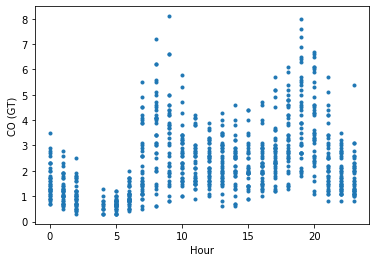

In [123]:
#Plotting Hour of the Day vs CO(GT)

plt.plot(X, T, '.');
plt.xlabel("Hour");
plt.ylabel("CO (GT)");

In [124]:
#Generic function with plots and function call
def experiments(n_powers, rho, n_steps):
    W = np.zeros((n_powers, 1)) #Starting weights
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)
    print('W =', W, '\nRMSE =', error_sequence[-1])
    #Plots to display RMSE vs Steps, Weights vs Steps, and Model
    fig = plt.figure(figsize=(15, 15))
    
    plt.subplot(2, 2, 1)
    plt.plot(error_sequence, 'g')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    
    plt.subplot(2, 2, 2)
    W_sequence = np.array(W_sequence)
    plt.plot(W_sequence)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    label = ['w'+str(i) for i in range(n_powers)]
    plt.legend(label);
    
    plt.subplot(2, 2, 3)
    plt.plot(X, T, 'co', label='Training Data')
    plt.plot(X, polynomial_model(X, W), 'r', label=f'Polynomial ({n_powers})')
    plt.xlabel('Hours')
    plt.ylabel('CO(GT)')
    plt.legend(); 
    
    plt.subplot(2, 2, 4)
    plt.plot(X, T, 'co', label='Training Data')
    plt.plot(X, polynomial_model(X, W), 'r.', label=f'Polynomial ({n_powers})')
    plt.xlabel('Hours')
    plt.ylabel('CO(GT)')
    plt.legend(); 
    
    

## Experiments 
*With Constant Learning Rate at 0.01*

W = [[ 0.55593999]
 [ 0.23592382]
 [-0.00608676]] 
RMSE = 1.2986659102700262


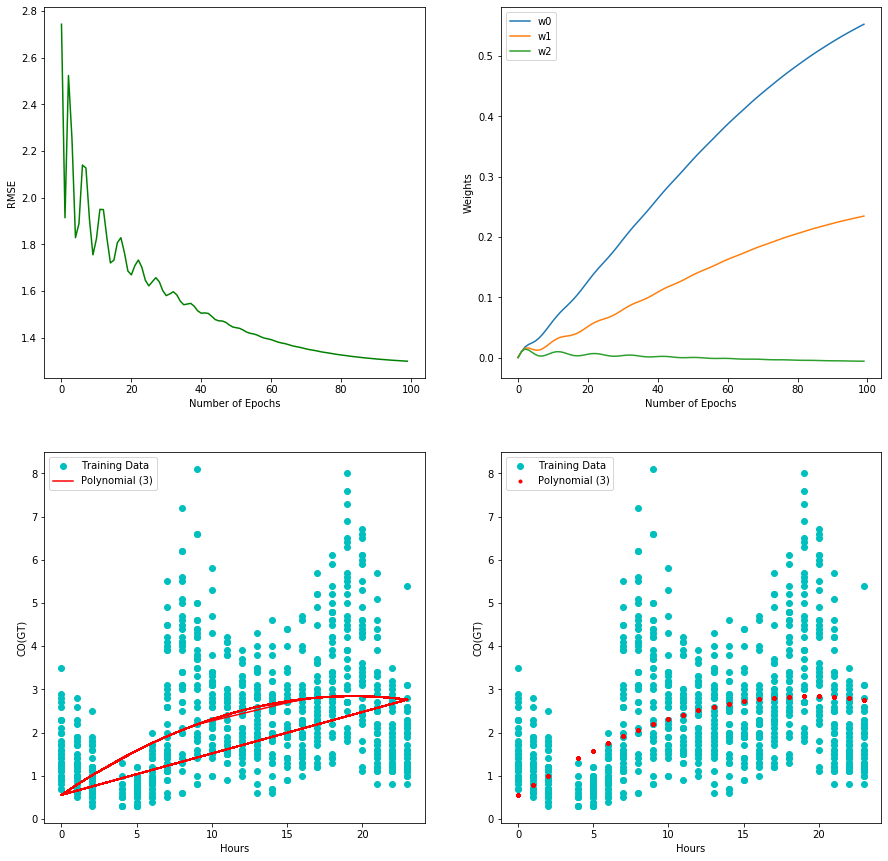

In [125]:
# Experiment 1 ---- Power = 3, Epochs = 100

experiments(3, 0.01, 100)

W = [[ 0.75988826]
 [ 0.25326164]
 [-0.00766492]] 
RMSE = 1.2834088691459375


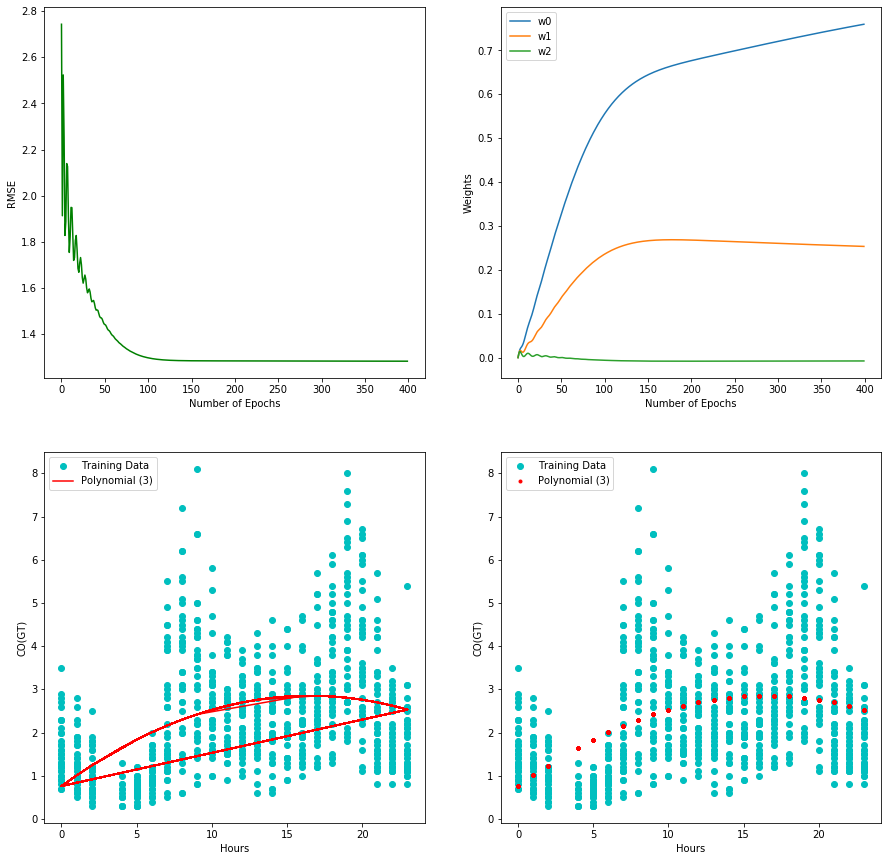

In [126]:
# Experiment 2 ---- Power = 3, Epochs = 400

experiments(3, 0.01, 400)

W = [[ 0.08617373]
 [ 0.03367784]
 [ 0.01229008]
 [-0.00033674]] 
RMSE = 1.583274931858319


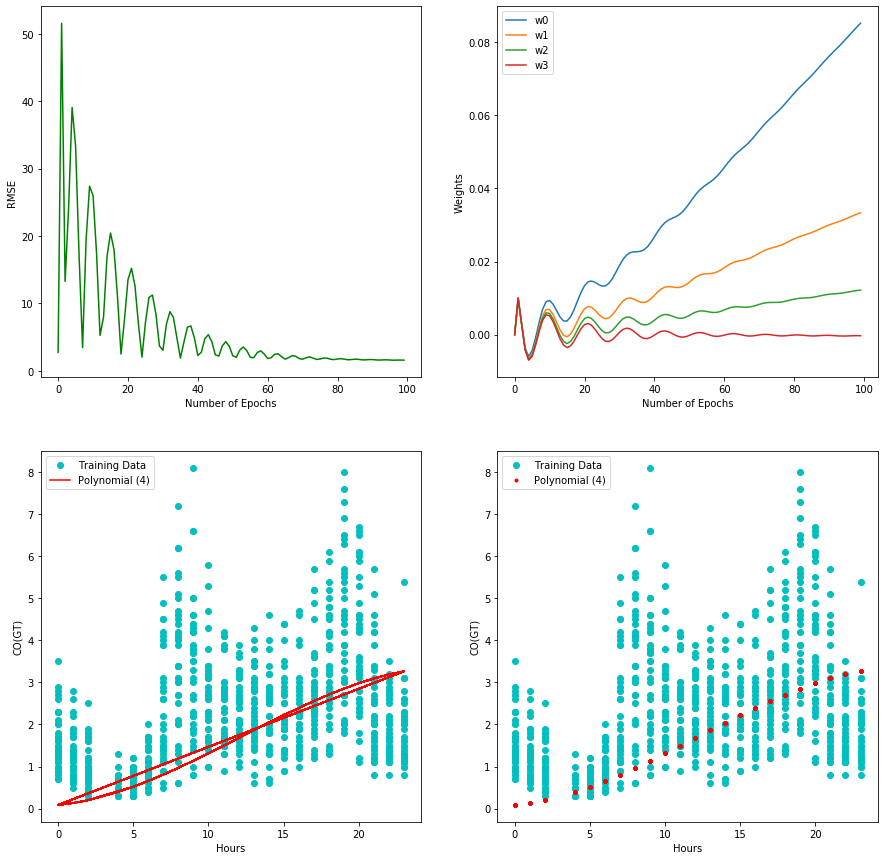

In [127]:
# Experiment 3 ---- Power = 4, Epochs = 100

experiments(4, 0.01, 100)

W = [[ 9.53173441e-01]
 [ 8.43650079e-02]
 [ 1.27325581e-02]
 [-6.12452194e-04]] 
RMSE = 1.2647739849684818


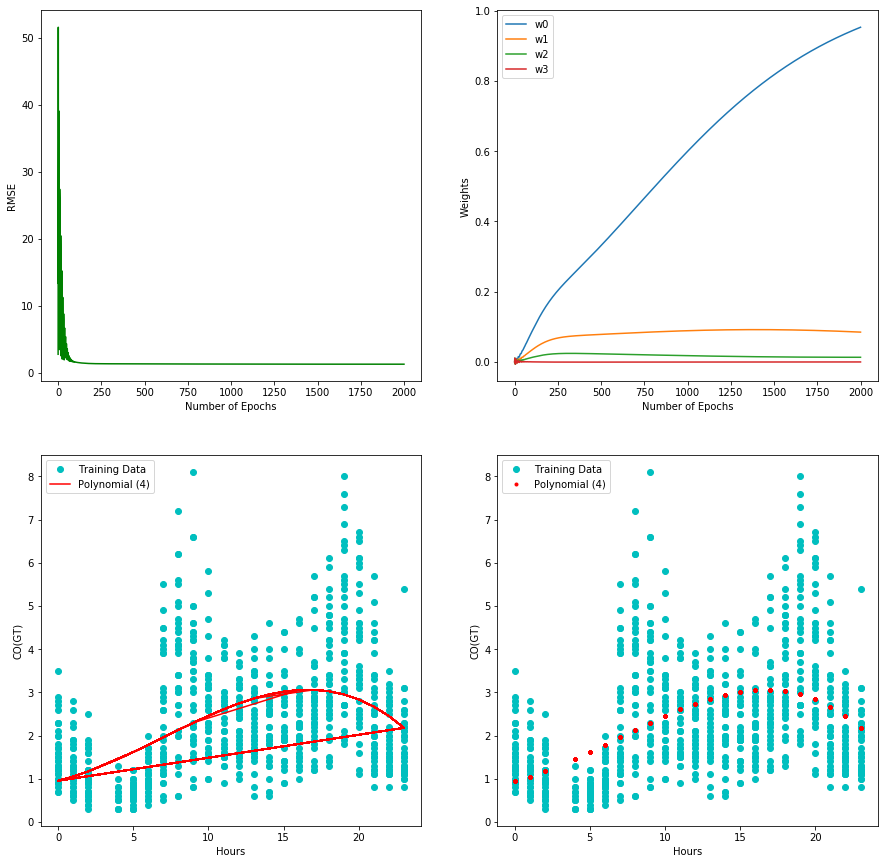

In [128]:
# Experiment 4 ---- Power = 4, Epochs = 2000

experiments(4, 0.01, 2000)

W = [[ 1.46552144e-02]
 [ 6.18648325e-03]
 [ 2.92353497e-03]
 [ 1.10737251e-03]
 [-4.47889119e-05]] 
RMSE = 1.6329209418995954


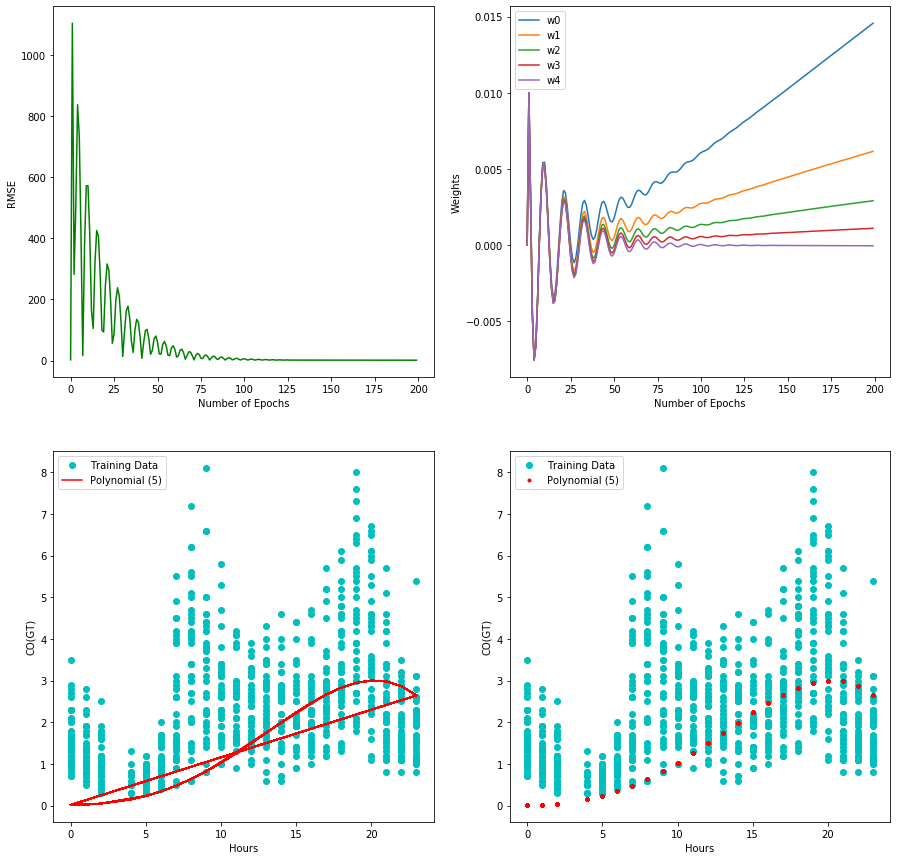

In [129]:
# Experiment 5 ---- Power = 5, Epochs = 200

experiments(5, 0.01, 200)

W = [[ 6.72118599e-01]
 [ 9.84517833e-02]
 [ 1.57318855e-02]
 [-8.22576808e-04]
 [ 3.08414754e-06]] 
RMSE = 1.275117981390376


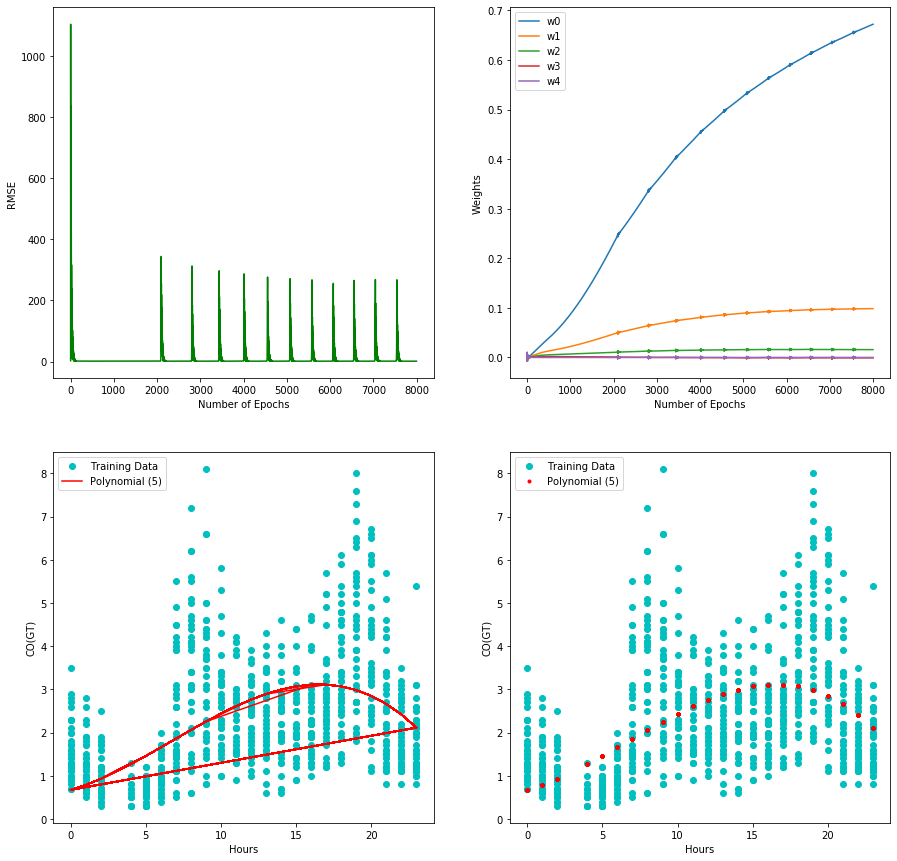

In [130]:
# Experiment 6 ---- Power = 5, rho = 0.01, Epochs = 8000

experiments(5, 0.01, 8000)

W = [[4.13038421e-04]
 [2.26198833e-04]
 [1.48607864e-04]
 [1.03932718e-04]
 [7.49074502e-05]
 [5.42912205e-05]] 
RMSE = 110.17464671383762


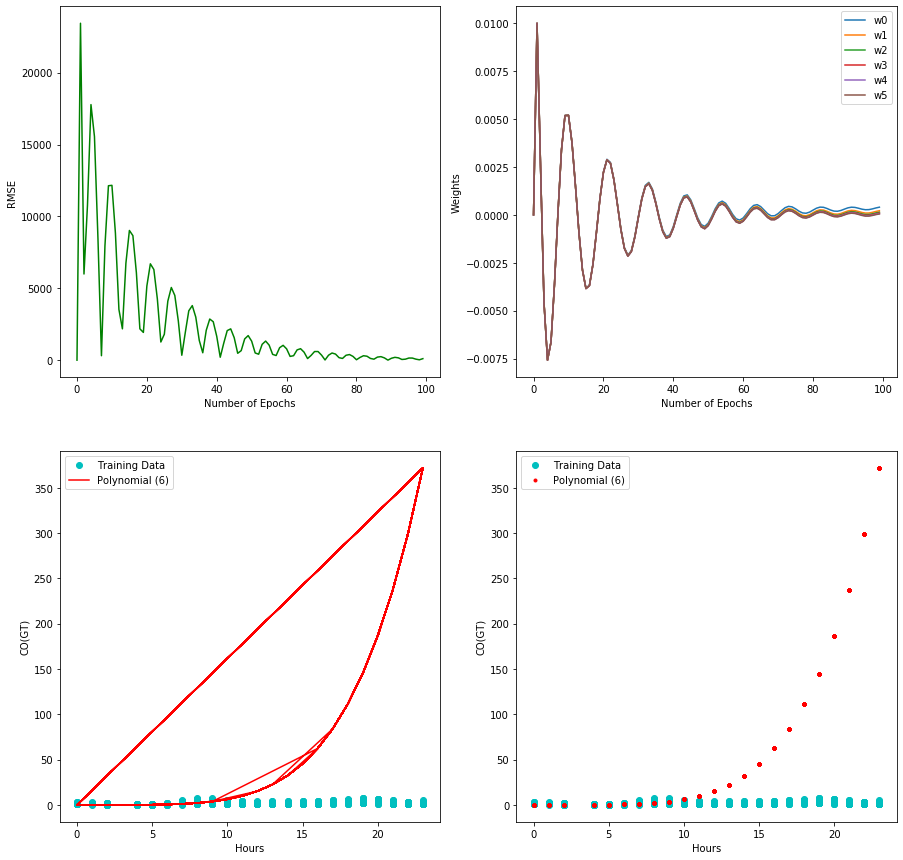

In [131]:
# Experiment 7 ---- Power = 6, rho = 0.01, Epochs = 100

experiments(6, 0.01, 100)

W = [[ 2.02742813e-01]
 [ 4.38092307e-02]
 [ 1.13055382e-02]
 [ 1.84699399e-03]
 [-1.80254918e-04]
 [ 3.54297330e-06]] 
RMSE = 1.3604190530061921


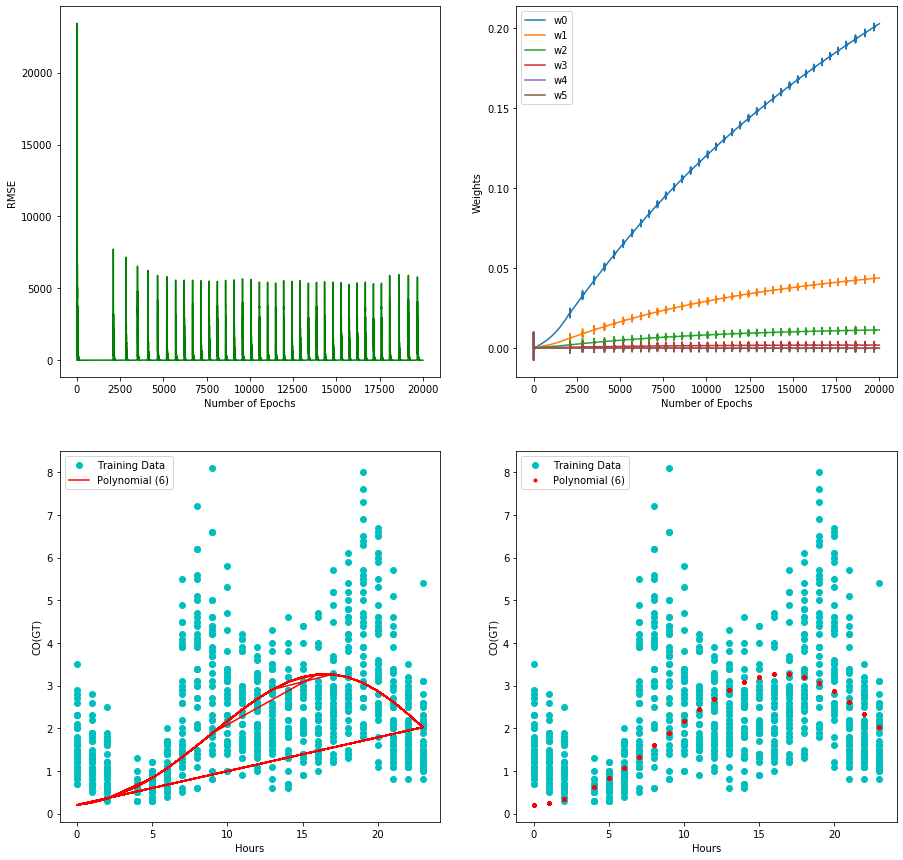

In [132]:
# Experiment 8 ---- Power = 6, rho = 0.01, Epochs = 20000

experiments(6, 0.01, 20000)

# Result Discussion
<br>
<br>
After experimenting with different values of steps/epochs and power, observed the following:
<br>
<br>
- For a <strong>power value of 3</strong>, the error seem to converge with less number of steps, of around 400. Weights corresponding to higher power go below 0 while the bias weight increases with the number of epochs. This was observed in all the experiments.
    The polynomial model line plot is a bit unusual going up and down, hence plotted it again with just the dot notation and looking from the plots,it seems like an okay fit compared to other experiment values.
<br>
<br>
- I got the best results with the <strong>power value = 4 and epoch value = 2000</strong>. It was the least RMSE I observed in the experiments with the value of <strong>1.2647</strong>. Most of the weight values are below 0.1 and almost converge slowly after 1000. Although RMSE plot suggests that its value converge around 1000, manual checking  of its values showed a slight decrease each time number of steps was increased. The model plot line seem to show a better fit compared to other experiments, but still doesn't seem to be doing good for this data on the whole.
<br>
<br>
- I observed that we need higher steps for RMSE to converge with higher powers, as can be in seen in the plot of <strong>Experiment 7</strong>, where the model line is no where near the data points for small number of steps.  The RMSE plots show a pattern of ups and downs with higher epochs and this seems to apply even for the weights as can be seen from the plots in Experiment 6 and 8. 
<br>
<br>
 - Looking at the weight plots for power value of 6 with lower step value of 100, we can see that all the weights converge together but as the number of steps increase only the higher power weights seem to converge together. This might indicate that for this model, going higher than 5 or 6 value of power might not be necessary and even RMSE values of a polynomial model with higher power seem to be high comparatively.
<br>
<br>
<em><strong>This data might do well with probably some other models because the the data plot shows a lot of irregular highs and lows of CO values w.r.t to the hours and this polynomial model might not be able to fit over most of the data points especially extreme cases as seen in the plots.</strong></em>